In [39]:
import random
import numpy as np
import os
import torch 

random.seed(13)
np.random.seed(13)
torch.manual_seed(13)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED'] = str(13)

### Download data


In [40]:
!wget https://www.dropbox.com/s/n8nfxxh5azocrrm/train_LASER.csv?dl=0
!wget https://www.dropbox.com/s/je9am5c77ytfcaf/test_LASER.csv?dl=0
!wget https://www.dropbox.com/s/v7msk8zxkkiqc6q/X_test_translated.txt?dl=0

--2020-04-25 12:34:40--  https://www.dropbox.com/s/n8nfxxh5azocrrm/train_LASER.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/n8nfxxh5azocrrm/train_LASER.csv [following]
--2020-04-25 12:34:41--  https://www.dropbox.com/s/raw/n8nfxxh5azocrrm/train_LASER.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3ca1bf874119b96837c03baaed.dl.dropboxusercontent.com/cd/0/inline/A2jXBu2cLs9RxKJCdLNQRvEvxEVeBGE2KBKeuxfT_QTQJWkLCzGPcbhxZYDapm80gNlQB6H1t8jzPqCPY9ZyEy2pg-LWOstmiFb5QKElyXnN9gimu_QbOlYVamNX3tX-m8E/file# [following]
--2020-04-25 12:34:41--  https://uc3ca1bf874119b96837c03baaed.dl.dropboxusercontent.com/cd/0/inline/A2jXBu2cLs9RxKJCdLNQRvEvxEVeBGE2KBKeuxfT_QTQJWkLCzGPcbhxZYDapm80gNlQB6H1t8jzPqCPY9ZyEy2pg-LWOstmiFb5

In [41]:
import pandas as pd
df_train = pd.read_csv("train_LASER.csv?dl=0").dropna()
train_texts = list(df_train['abstracts'])
train_labels = list(df_train['labels'])

len(train_texts)

80948

In [42]:
df_test = pd.read_csv("test_LASER.csv?dl=0").dropna()
test_texts = list(df_test['lemm_abstracts'])
test_labels = list(df_test['labels'])

len(test_texts)

10150

In [43]:
def cleaning(text):
    clean_txt = []
    for sentence in text.split('.'):
        sentence = re.sub(r'[•⋅−]', ' ', sentence)
        pattern = re.compile(r'(\s,){2,}')                 # регулярка для того чтобы несколько подряд запятых заменять на одну
        sentence = re.sub(pattern, ', ', sentence)
        sent = sentence.strip()
        sent = re.sub(r'( )+', ' ', sent)
        sent = re.sub(' ,', ',', sent)
        if len(sent.split()) > 2 and sent != 'ф лы, ил': 
             clean_txt.append(sent.lstrip(',').rstrip(',').strip())
    return '. '.join(clean_txt)

In [44]:
from tqdm import tqdm_notebook as tqdm
import re
test_texts = [cleaning(text) for text in tqdm(test_texts)]
train_texts = [cleaning(text) for text in tqdm(train_texts)]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [45]:
with open('X_test_translated.txt?dl=0', encoding='utf-8') as of:
    translated_texts = of.readlines()
    of.close()
    
translated_texts = [text.strip() for text in translated_texts]

In [46]:
test_texts[2000]

'изобретение относится к электротехнике, в частности к передаче электрической энергии, и может использоваться для приема электроэнергии потребителем по беспроводному вихревому каналу текучей среды по воздуху, воде, пару, например для летящего самолета по протяженному км турбулентному следу или по вихревому следу гребных винтов морского судна, для передачи электроэнергии внутри трубопроводов газа, нефти, воды, в которых поддерживается вращающийся вихревой жгут, для наземного использования между линиями электропередачи, находящимися в прямой видимости друг от друга и имеющими вращающиеся завихрители воздуха, создающие канал. технический результат состоит в упрощении и уменьшении материалоемкости транспортного канала электричества. высокочастотное электричество передается по одному проводящему каналу, сформированному пограничным слоем удлиненной вихревой воронки, являющейся проводником, самоподдерживающим свою структуру за счет направленного осевого потока электронов и вращения вокруг оси

In [48]:
translated_texts[2000]

'the invention relates to electrical engineering, in particular to the transmission of electric energy, and can be used for the reception of electricity by the consumer at the wireless vortex channel of the fluid by air, water, steam, for example, of an airplane for the long km the trail of turbulent or vortex trail of the propeller of a marine vessel, for transfer of electricity inside the pipelines for gas, oil, water, in which is supported a rotating vortex harness for land use between power transmission lines that are in direct visibility from each other and having a rotating swirlers of the air, creating a channel. the technical result consists in simplifying and reducing the material intensity of the transport channel electricity. high frequency electricity is transmitted through one conducting channel formed by the border layer of the elongated vortex, which is a conductor, its self-sustaining structure due to the directed axial flow of electrons and rotation about the axis of t

In [47]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_labels)
#add_labels = label_encoder.fit_transform(df_add['us_code'])
y_train[:10]

array([182, 222,  54, 216,   2, 130, 179,  33, 116,  61])

In [49]:
y_test = label_encoder.transform(test_labels)
y_test[:10]

array([163, 221,   1,  45, 114, 111, 159, 221, 191, 130])


Google Colab offers free GPUs and TPUs! Since we'll be training a large neural network it's best to take advantage of this (in this case we'll attach a GPU), otherwise training will take a very long time.

A GPU can be added by going to the menu and selecting:

`Edit 🡒 Notebook Settings 🡒 Hardware accelerator 🡒 (GPU)`

Then run the following cell to confirm that the GPU is detected.

In [50]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In order for torch to use the GPU, we need to identify and specify the GPU as the device. Later, in our training loop, we will load data onto the device. 

In [51]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


### Installing the Hugging Face Library


In [52]:
!pip install transformers

 ### Parse dataset

We can see from the file names that both `tokenized` and `raw` versions of the data are available. 

We can't use the pre-tokenized version because, in order to apply the pre-trained BERT, we *must* use the tokenizer provided by the model. This is because (1) the model has a specific, fixed vocabulary and (2) the BERT tokenizer has a particular way of handling out-of-vocabulary words.

We'll use pandas to parse the "in-domain" training set and look at a few of its properties and data points.

In [53]:
# Get the lists of sentences and their labels.
import numpy as np
sentences_train = np.array(train_texts)
labels_train = y_train
sentences_train.shape

(80948,)

In [87]:
import numpy as np
#sentences_test = np.array(test_texts)
sentences_test = np.array(translated_texts)
labels_test = y_test
sentences_test.shape

(10150,)

In [55]:
sentences_train[0]

'a wireless type prepaid ic card system enhances the convenience of users and assures the safe payment of tolls by vehicles including bikes when introduced for toll roads. this toll collecting system is composed of a card processor that is arranged in a booth for the toll collection process and has an antenna unit for executing the card process through the wireless communication with ic cards, antenna units arranged at the left and right roadsides of the booth for executing the card process through the wireless communication with ic cards, a vehicle class discriminator for discriminating classes of vehicles entering into a traffic lane, and a traffic lane controller that selects an antenna unit to perform the card process according to a discriminated vehicle class and controls the card process'

In [56]:
lens_train=[len(sentence.split()) for sentence in sentences_train]

In [57]:
np.mean(lens_train) + 3*np.std(lens_train)

257.5396251429629

# 3. Tokenization & Input Formatting

In this section, we'll transform our dataset into the format that BERT can be trained on.

## 3.1. BERT Tokenizer


To feed our text to BERT, it must be split into tokens, and then these tokens must be mapped to their index in the tokenizer vocabulary.

The tokenization must be performed by the tokenizer included with BERT--the below cell will download this for us. We'll be using the "uncased" version here.


In [58]:
from transformers import BertTokenizer
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=True)
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Let's apply the tokenizer to one sentence just to see the output.


In [59]:
# Print the original sentence.
print(' Original: ', sentences_train[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences_train[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences_train[0])))

 Original:  a wireless type prepaid ic card system enhances the convenience of users and assures the safe payment of tolls by vehicles including bikes when introduced for toll roads. this toll collecting system is composed of a card processor that is arranged in a booth for the toll collection process and has an antenna unit for executing the card process through the wireless communication with ic cards, antenna units arranged at the left and right roadsides of the booth for executing the card process through the wireless communication with ic cards, a vehicle class discriminator for discriminating classes of vehicles entering into a traffic lane, and a traffic lane controller that selects an antenna unit to perform the card process according to a discriminated vehicle class and controls the card process
Tokenized:  ['a', 'wireless', 'type', 'pre', '##pai', '##d', 'i', '##c', 'card', 'system', 'en', '##hance', '##s', 'the', 'con', '##veni', '##ence', 'of', 'users', 'and', 'assure', '##

When we actually convert all of our sentences, we'll use the `tokenize.encode` function to handle both steps, rather than calling `tokenize` and `convert_tokens_to_ids` separately. 

Before we can do that, though, we need to talk about some of BERT's formatting requirements.

### Required Formatting

### Special Tokens



**`[SEP]`**

At the end of every sentence, we need to append the special `[SEP]` token. 

This token is an artifact of two-sentence tasks, where BERT is given two separate sentences and asked to determine something (e.g., can the answer to the question in sentence A be found in sentence B?). 

I am not certain yet why the token is still required when we have only single-sentence input, but it is!


**`[CLS]`**

For classification tasks, we must prepend the special `[CLS]` token to the beginning of every sentence.

This token has special significance. BERT consists of 12 Transformer layers. Each transformer takes in a list of token embeddings, and produces the same number of embeddings on the output (but with the feature values changed, of course!).

![Illustration of CLS token purpose](http://www.mccormickml.com/assets/BERT/CLS_token_500x606.png)

On the output of the final (12th) transformer, *only the first embedding (corresponding to the [CLS] token) is used by the classifier*.

>  "The first token of every sequence is always a special classification token (`[CLS]`). The final hidden state
corresponding to this token is used as the aggregate sequence representation for classification
tasks." (from the [BERT paper](https://arxiv.org/pdf/1810.04805.pdf))

I'm not sure why the authors took this strategy instead of some kind of pooling of all the final vectors, but I'm sure that if pooling were better they would have gone that route. 

Also, because BERT is trained to only use this [CLS] token for classification, we know that the model has been motivated to encode everything it needs for the classification step into that single 768-value embedding vector.



### Sentence Length & Attention Mask



The sentences in our dataset obviously have varying lengths, so how does BERT handle this?

BERT has two constraints:
1. All sentences must be padded or truncated to a single, fixed length.
2. The maximum sentence length is 512 tokens.

Padding is done with a special `[PAD]` token, which is at index 0 in the BERT vocabulary. The below illustration demonstrates padding out to a "MAX_LEN" of 8 tokens.

<img src="http://www.mccormickml.com/assets/BERT/padding_and_mask.png" width="600">

The "Attention Mask" is simply an array of 1s and 0s indicating which tokens are padding and which aren't (seems kind of redundant, doesn't it?! Again, I don't currently know why).

I've experimented with running this notebook with two different values of MAX_LEN, and it impacted both the training speed and the  test set accuracy.

With a Tesla K80 and:

```
MAX_LEN = 128  -->  Training epochs take ~5:28 each, score is 0.535
MAX_LEN = 64   -->  Training epochs take ~2:57 each, score is 0.566
```
These results suggest to me that the padding tokens aren't simply skipped over--that they are in fact fed through the model and incorporated in the results (thereby impacting both model speed and accuracy). I'll have to dig into the architecture more to understand this.






## 3.2. Sentences to IDs

The `tokenizer.encode` function combines multiple steps for us:
1. Split the sentence into tokens.
2. Add the special `[CLS]` and `[SEP]` tokens.
3. Map the tokens to their IDs.

Oddly, this function can perform truncating for us, but doesn't handle padding. 

In [60]:
# Tokenize all of the sentences and map the tokens to thier word IDs.

input_ids_train = []

# For every sentence...
for sent in tqdm(sentences_train):
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        max_length = 256         # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.
    input_ids_train.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences_train[0])
print('Token IDs:', input_ids_train[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Original:  a wireless type prepaid ic card system enhances the convenience of users and assures the safe payment of tolls by vehicles including bikes when introduced for toll roads. this toll collecting system is composed of a card processor that is arranged in a booth for the toll collection process and has an antenna unit for executing the card process through the wireless communication with ic cards, antenna units arranged at the left and right roadsides of the booth for executing the card process through the wireless communication with ic cards, a vehicle class discriminator for discriminating classes of vehicles entering into a traffic lane, and a traffic lane controller that selects an antenna unit to perform the card process according to a discriminated vehicle class and controls the card process
Token IDs: [101, 169, 99531, 12807, 12229, 48778, 10162, 177, 10350, 23050, 11787, 10110, 100586, 10107, 10105, 10173, 53590, 18492, 10108, 32095, 10111, 62316, 10107, 10105, 43966, 67

## 3.3. Padding & Truncating

In [61]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 256

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids_train = pad_sequences(input_ids_train, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")
#input_ids_test = pad_sequences(input_ids_test, maxlen=MAX_LEN, dtype="long", 
        #                  value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 256 values...

Padding token: "[PAD]", ID: 0

Done.


## 3.4. Attention Masks

The attention mask simply makes it explicit which tokens are actual words versus which are padding. 

The BERT vocabulary does not use the ID 0, so if a token ID is 0, then it's padding, and otherwise it's a real token.

In [62]:
# Create attention masks
attention_masks_tr = []

# For each sentence...
for sent in tqdm(input_ids_train):
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks_tr.append(att_mask)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


## 3.5. Training & Validation Split


Divide up our training set to use 90% for training and 10% for validation.

In [63]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 85% for training and 15% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids_train, labels_train, 
                                                            random_state=42, test_size=0.15, shuffle=True, stratify=y_train)

# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks_tr, labels_train,
                                             random_state=42, test_size=0.15, shuffle=True, stratify=y_train)

In [64]:
len(train_inputs)

68805

## 3.6. Converting to PyTorch Data Types

Our model expects PyTorch tensors rather than numpy.ndarrays, so convert all of our dataset variables.

In [65]:
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

We'll also create an iterator for our dataset using the torch DataLoader class. This helps save on memory during training because, unlike a for loop, with an iterator the entire dataset does not need to be loaded into memory.

In [66]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 8

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


# 4. Train Our Classification Model

Now that our input data is properly formatted, it's time to fine tune the BERT model. 

### BertForSequenceClassification

In [67]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased", # Use the 12-layer BERT model, with an uncased vocab. #bert-base-multiligual-cased
    num_labels = 225, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [68]:
model.bert.embeddings.word_embeddings.weight.requires_grad = False

In [69]:
print(model.bert.embeddings.word_embeddings.weight.requires_grad)
print(model.bert.embeddings.position_embeddings.weight.requires_grad)

False
True


## 4.2. Optimizer & Learning Rate Scheduler

Now that we have our model loaded we need to grab the training hyperparameters from within the stored model.

For the purposes of fine-tuning, the authors recommend choosing from the following values:
- Batch size: 16, 32  (We chose 32 when creating our DataLoaders).
- Learning rate (Adam): 5e-5, 3e-5, 2e-5  (We'll use 2e-5).
- Number of epochs: 2, 3, 4  (We'll use 4).

The epsilon parameter `eps = 1e-8` is "a very small number to prevent any division by zero in the implementation" (from [here](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)).

You can find the creation of the AdamW optimizer in `run_glue.py` [here](https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L109).

In [70]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8, # args.adam_epsilon  - default is 1e-8.
               weight_decay=1e-3)


In [71]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 3

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

### Training Loop

Below is our training loop. There's a lot going on, but fundamentally for each pass in our loop we have a trianing phase and a validation phase. At each pass we need to:

Training loop:
- Unpack our data inputs and labels
- Load data onto the GPU for acceleration
- Clear out the gradients calculated in the previous pass. 
    - In pytorch the gradients accumulate by default (useful for things like RNNs) unless you explicitly clear them out.
- Forward pass (feed input data through the network)
- Backward pass (backpropagation)
- Tell the network to update parameters with optimizer.step()
- Track variables for monitoring progress

Evalution loop:
- Unpack our data inputs and labels
- Load data onto the GPU for acceleration
- Forward pass (feed input data through the network)
- Compute loss on our validation data and track variables for monitoring progress

So please read carefully through the comments to get an understanding of what's happening. If you're unfamiliar with pytorch a quick look at some of their [beginner tutorials](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) will help show you that training loops really involve only a few simple steps; the rest is usually just decoration and logging.  

Define a helper function for calculating accuracy.

In [72]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

Helper function for formatting elapsed times.


In [73]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


We're ready to kick off the training!

In [74]:
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))
    
    output_dir = './model_save/'

    # Create output directory if needed
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
    model_to_save.save_pretrained(output_dir)
    tokenizer.save_pretrained(output_dir)
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.4f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 3 ========
Training...
  Batch    40  of  8,601.    Elapsed: 0:00:09.
  Batch    80  of  8,601.    Elapsed: 0:00:19.
  Batch   120  of  8,601.    Elapsed: 0:00:28.
  Batch   160  of  8,601.    Elapsed: 0:00:38.
  Batch   200  of  8,601.    Elapsed: 0:00:47.
  Batch   240  of  8,601.    Elapsed: 0:00:57.
  Batch   280  of  8,601.    Elapsed: 0:01:06.
  Batch   320  of  8,601.    Elapsed: 0:01:16.
  Batch   360  of  8,601.    Elapsed: 0:01:25.
  Batch   400  of  8,601.    Elapsed: 0:01:34.
  Batch   440  of  8,601.    Elapsed: 0:01:44.
  Batch   480  of  8,601.    Elapsed: 0:01:53.
  Batch   520  of  8,601.    Elapsed: 0:02:03.
  Batch   560  of  8,601.    Elapsed: 0:02:12.
  Batch   600  of  8,601.    Elapsed: 0:02:21.
  Batch   640  of  8,601.    Elapsed: 0:02:31.
  Batch   680  of  8,601.    Elapsed: 0:02:40.
  Batch   720  of  8,601.    Elapsed: 0:02:50.
  Batch   760  of  8,601.    Elapsed: 0:02:59.
  Batch   800  of  8,601.    Elapsed: 0:03:09.
  Batch   840  of

  Batch 7,000  of  8,601.    Elapsed: 0:27:19.
  Batch 7,040  of  8,601.    Elapsed: 0:27:28.
  Batch 7,080  of  8,601.    Elapsed: 0:27:37.
  Batch 7,120  of  8,601.    Elapsed: 0:27:47.
  Batch 7,160  of  8,601.    Elapsed: 0:27:56.
  Batch 7,200  of  8,601.    Elapsed: 0:28:06.
  Batch 7,240  of  8,601.    Elapsed: 0:28:15.
  Batch 7,280  of  8,601.    Elapsed: 0:28:24.
  Batch 7,320  of  8,601.    Elapsed: 0:28:33.
  Batch 7,360  of  8,601.    Elapsed: 0:28:43.
  Batch 7,400  of  8,601.    Elapsed: 0:28:52.
  Batch 7,440  of  8,601.    Elapsed: 0:29:02.
  Batch 7,480  of  8,601.    Elapsed: 0:29:11.
  Batch 7,520  of  8,601.    Elapsed: 0:29:20.
  Batch 7,560  of  8,601.    Elapsed: 0:29:30.
  Batch 7,600  of  8,601.    Elapsed: 0:29:39.
  Batch 7,640  of  8,601.    Elapsed: 0:29:49.
  Batch 7,680  of  8,601.    Elapsed: 0:29:58.
  Batch 7,720  of  8,601.    Elapsed: 0:30:08.
  Batch 7,760  of  8,601.    Elapsed: 0:30:17.
  Batch 7,800  of  8,601.    Elapsed: 0:30:26.
  Batch 7,840

  Batch 5,240  of  8,601.    Elapsed: 0:20:28.
  Batch 5,280  of  8,601.    Elapsed: 0:20:37.
  Batch 5,320  of  8,601.    Elapsed: 0:20:47.
  Batch 5,360  of  8,601.    Elapsed: 0:20:56.
  Batch 5,400  of  8,601.    Elapsed: 0:21:05.
  Batch 5,440  of  8,601.    Elapsed: 0:21:15.
  Batch 5,480  of  8,601.    Elapsed: 0:21:24.
  Batch 5,520  of  8,601.    Elapsed: 0:21:34.
  Batch 5,560  of  8,601.    Elapsed: 0:21:43.
  Batch 5,600  of  8,601.    Elapsed: 0:21:52.
  Batch 5,640  of  8,601.    Elapsed: 0:22:02.
  Batch 5,680  of  8,601.    Elapsed: 0:22:11.
  Batch 5,720  of  8,601.    Elapsed: 0:22:20.
  Batch 5,760  of  8,601.    Elapsed: 0:22:30.
  Batch 5,800  of  8,601.    Elapsed: 0:22:39.
  Batch 5,840  of  8,601.    Elapsed: 0:22:48.
  Batch 5,880  of  8,601.    Elapsed: 0:22:58.
  Batch 5,920  of  8,601.    Elapsed: 0:23:07.
  Batch 5,960  of  8,601.    Elapsed: 0:23:16.
  Batch 6,000  of  8,601.    Elapsed: 0:23:26.
  Batch 6,040  of  8,601.    Elapsed: 0:23:35.
  Batch 6,080

  Batch 3,480  of  8,601.    Elapsed: 0:13:34.
  Batch 3,520  of  8,601.    Elapsed: 0:13:43.
  Batch 3,560  of  8,601.    Elapsed: 0:13:52.
  Batch 3,600  of  8,601.    Elapsed: 0:14:02.
  Batch 3,640  of  8,601.    Elapsed: 0:14:11.
  Batch 3,680  of  8,601.    Elapsed: 0:14:20.
  Batch 3,720  of  8,601.    Elapsed: 0:14:30.
  Batch 3,760  of  8,601.    Elapsed: 0:14:39.
  Batch 3,800  of  8,601.    Elapsed: 0:14:49.
  Batch 3,840  of  8,601.    Elapsed: 0:14:58.
  Batch 3,880  of  8,601.    Elapsed: 0:15:07.
  Batch 3,920  of  8,601.    Elapsed: 0:15:16.
  Batch 3,960  of  8,601.    Elapsed: 0:15:26.
  Batch 4,000  of  8,601.    Elapsed: 0:15:35.
  Batch 4,040  of  8,601.    Elapsed: 0:15:45.
  Batch 4,080  of  8,601.    Elapsed: 0:15:54.
  Batch 4,120  of  8,601.    Elapsed: 0:16:03.
  Batch 4,160  of  8,601.    Elapsed: 0:16:12.
  Batch 4,200  of  8,601.    Elapsed: 0:16:22.
  Batch 4,240  of  8,601.    Elapsed: 0:16:31.
  Batch 4,280  of  8,601.    Elapsed: 0:16:41.
  Batch 4,320

Let's take a look at our training loss over all batches:

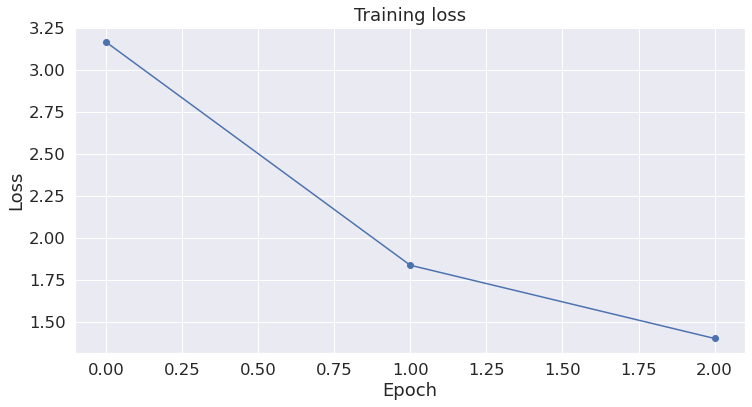

In [75]:
#% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

### Performance On Test Set

#### Data Preparation



We'll need to apply all of the same steps that we did for the training data to prepare our test data set.

In [88]:
import pandas as pd

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in tqdm(sentences_test):
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(y_test)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


#### Evaluate on Test Set



With the test set prepared, we can apply our fine-tuned model to generate predictions on the test set.

In [89]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in tqdm(prediction_dataloader):
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(np.argmax(logits, axis=1).flatten())
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 10,150 test sentences...


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':



    DONE.


In [90]:
predictions = np.concatenate(predictions)
true_labels = np.concatenate(true_labels)

In [79]:
#test
from sklearn.metrics import f1_score
print('f1-micro: ', f1_score(true_labels, predictions, average='micro')*100)
print('f1-weighted: ', f1_score(true_labels, predictions, average='weighted')*100)

f1-micro:  25.054187192118228
f1-weighted:  21.816304579989843


In [91]:
#test translated

print('f1-micro: ', f1_score(true_labels, predictions, average='micro')*100)
print('f1-weighted: ', f1_score(true_labels, predictions, average='weighted')*100)

f1-micro:  59.51724137931035
f1-weighted:  57.67772748759013


In [82]:
#train

print('f1-micro: ', f1_score(true_labels, predictions, average='micro')*100)
print('f1-weighted: ', f1_score(true_labels, predictions, average='weighted')*100)

f1-micro:  71.95988663614563
f1-weighted:  70.49832542739635


In [86]:
#val
print('f1-micro: ', f1_score(true_labels, predictions, average='micro')*100)
print('f1-weighted: ', f1_score(true_labels, predictions, average='weighted')*100)

f1-micro:  61.615745697109446
f1-weighted:  60.148391742045135


# Conclusion

This post demonstrates that with a pre-trained BERT model you can quickly and effectively create a high quality model with minimal effort and training time using the pytorch interface, regardless of the specific NLP task you are interested in.

# Appendix


## A1. Saving & Loading Fine-Tuned Model

This first cell (taken from `run_glue.py` [here](https://github.com/huggingface/transformers/blob/35ff345fc9df9e777b27903f11fa213e4052595b/examples/run_glue.py#L495)) writes the model and tokenizer out to disk.

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Let's check out the file sizes, out of curiosity.

In [ ]:
!ls -l --block-size=K ./model_save/

The largest file is the model weights, at around 418 megabytes.

In [ ]:
!ls -l --block-size=M ./model_save/pytorch_model.bin

To save your model across Colab Notebook sessions, download it to your local machine, or ideally copy it to your Google Drive.

The following functions will load the model back from disk.

In [ ]:
# Load a trained model and vocabulary that you have fine-tuned
model = BertForSequenceClassification.from_pretrained('./model_save/')
tokenizer = BertTokenizer.from_pretrained('./model_save/')

# Copy the model to the GPU.
model.to(device)